In [61]:
import numpy as np
import matplotlib.pyplot as plt

c = 299_792_458 #m/s

In [62]:
def diffraction4beta(alpha, wavelength, m, d):
    alpha = np.deg2rad(alpha)
    beta = np.arcsin(m*wavelength/d -np.sin(alpha))
    beta = np.rad2deg(beta)
    return beta

def diffraction4wavelength(alpha, beta, m, d):
    alpha = np.deg2rad(alpha)
    beta = np.deg2rad(beta)
    wavelength = d/m *(np.sin(alpha) + np.sin(beta))
    return wavelength

def blazing4beta(alpha, gamma):
    return 2*gamma - alpha

def recip(x):
    return c*1e-6 / x #converts um to THz or vice versa. #1e4 / x # converts um to cm^-1 or vice versa. 

In [63]:
d = 60 #um
alpha = 0 #degrees #defined to be positive (This sign convention sucks)
blazing_angle = 5 #degrees #can be negative
wavelength_min, wavelength_max = 10, 300 #um
order_min, order_max = -6, 6

wavelengths, orders = np.mgrid[wavelength_min: wavelength_max: 200j , #An imaginary step is like using np.linspace instead of np.arange
                               order_min: order_max+1]

betas = diffraction4beta(alpha, wavelengths *1e-6, orders, d *1e-6)
blazing_beta = blazing4beta(alpha, blazing_angle)
blazing_wavelengths = diffraction4wavelength(alpha, blazing_beta, orders[0], d)
print(blazing_wavelengths)
valid_wavelength = np.logical_and(wavelength_min < blazing_wavelengths, blazing_wavelengths < wavelength_max)
blazing_wavelengths = np.where(valid_wavelength,blazing_wavelengths,np.nan)

[ -1.73648178  -2.08377813  -2.60472267  -3.47296355  -5.20944533
 -10.41889066          inf  10.41889066   5.20944533   3.47296355
   2.60472267   2.08377813   1.73648178]


C:\Users\syf83691\AppData\Local\Temp\ipykernel_1884\2178122248.py:3: RuntimeWarning: invalid value encountered in arcsin
  beta = np.arcsin(m*wavelength/d -np.sin(alpha))
C:\Users\syf83691\AppData\Local\Temp\ipykernel_1884\2178122248.py:10: RuntimeWarning: divide by zero encountered in divide
  wavelength = d/m *(np.sin(alpha) + np.sin(beta))


C:\Users\syf83691\AppData\Local\Temp\ipykernel_1884\2178122248.py:17: RuntimeWarning: divide by zero encountered in divide
  return c*1e-6 / x #converts um to THz or vice versa. #1e4 / x # converts um to cm^-1 or vice versa.


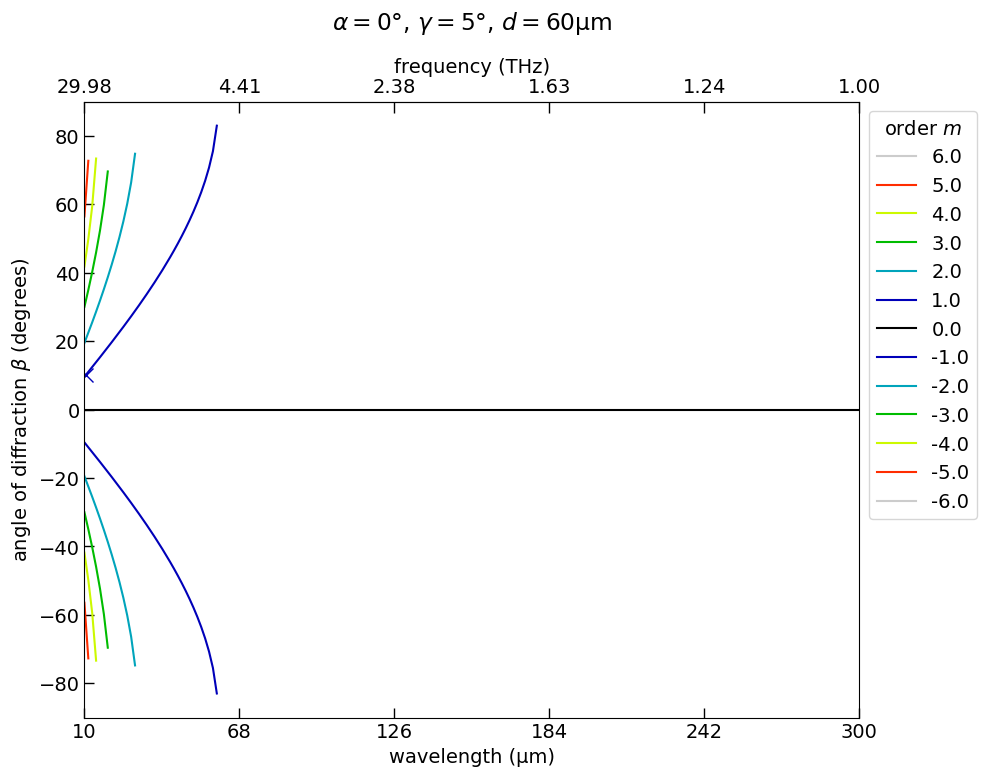

In [71]:
plt.rcParams.update({'font.size':14, "xtick.major.size":7, "xtick.direction": "in",
                     "ytick.major.size":7, "ytick.direction": "in",
                     'font.size':14, "lines.markersize":10, "axes.titlepad":20})

colours = plt.cm.nipy_spectral(abs(orders[0]) /6)
xticks = np.linspace(wavelength_min, wavelength_max, 6)
yticks = np.arange(-80,81,20)

fig, axs = plt.subplots(figsize= (10,8))

for i, order in enumerate(orders[0]):
    plt.plot(wavelengths[:,i], betas[:,i], label= order, color= colours[i])

for i, order in enumerate(orders[0]):
    plt.plot(blazing_wavelengths[i], blazing_beta, color= colours[i], linestyle= "None", marker= "x")

#plt.hlines([blazing_beta], [wavelength_min], [wavelength_max], colors= ["crimson"], linestyles= ["--"])

axs.set(xlabel= "wavelength (μm)", xlim= (wavelength_min,wavelength_max), xticks= xticks,
        ylabel= "angle of diffraction $β$ (degrees)", ylim= (-90,90), yticks= np.arange(-80,81,20),
        title= "$α = {0:1d}$°, $γ = {1:1d}$°, $d = {2:1d}$μm".format(alpha, blazing_angle, d))

plt.tick_params(length= 7, width= 1)


secax = axs.secondary_xaxis('top', functions=(recip, recip))

secax.set(xlabel= 'frequency (THz)', xticks= recip(xticks))
secax.tick_params(direction= "in", length= 8, width= 1) #secax in not a part of the axs dictionary so it didn't get the memo.


plt.legend(title= "order $m$", reverse= True, bbox_to_anchor= (1,1))
plt.show()

In [65]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b